In [10]:
import pandas as pd

In [11]:
import os
print(os.getcwd())

C:\Users\Shihab Uddin


In [83]:
data = pd.read_csv(r'D:\DataSets\London Housing Data.csv')

In [84]:
data

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN
...,...,...,...,...,...,...
13544,9/1/2019,england,249942,E92000001,64605.0,NaN
13545,10/1/2019,england,249376,E92000001,68677.0,NaN
13546,11/1/2019,england,248515,E92000001,67814.0,NaN
13547,12/1/2019,england,250410,E92000001,NaN,NaN


In [18]:
data.count()

date             13549
area             13549
average_price    13549
code             13549
houses_sold      13455
no_of_crimes      7439
dtype: int64

*Check how many data are missing in No of Crimes column*

In [21]:
data.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

In [19]:
data['no_of_crimes'].isnull().sum()

6110

Heatmap

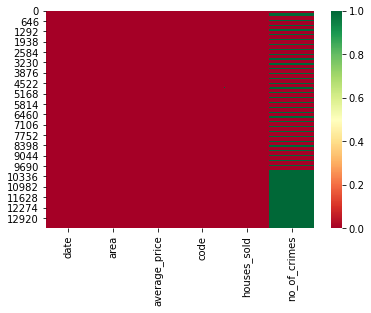

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.isnull(),cmap='RdYlGn',fmt=" ")
plt.show()

*Convert date into Date Time formate*


In [85]:
data.date = pd.to_datetime(data.date)

In [86]:
data

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN
2,1995-03-01,city of london,79121,E09000001,14.0,NaN
3,1995-04-01,city of london,77101,E09000001,7.0,NaN
4,1995-05-01,city of london,84409,E09000001,10.0,NaN
...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,NaN
13545,2019-10-01,england,249376,E92000001,68677.0,NaN
13546,2019-11-01,england,248515,E92000001,67814.0,NaN
13547,2019-12-01,england,250410,E92000001,NaN,NaN


Add a new column which will have only year

In [87]:
data['Year'] = data.date.dt.year
data.insert(1,"Month",data.date.dt.month)

In [56]:
# data.drop(['Month'],axis=1,inplace=True)

In [88]:
data

,date,Month,area,average_price,code,houses_sold,no_of_crimes,Year
0,1995-01-01,1,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,2,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,3,city of london,79121,E09000001,14.0,NaN,1995
3,1995-04-01,4,city of london,77101,E09000001,7.0,NaN,1995
4,1995-05-01,5,city of london,84409,E09000001,10.0,NaN,1995
...,...,...,...,...,...,...,...,...
13544,2019-09-01,9,england,249942,E92000001,64605.0,NaN,2019
13545,2019-10-01,10,england,249376,E92000001,68677.0,NaN,2019
13546,2019-11-01,11,england,248515,E92000001,67814.0,NaN,2019
13547,2019-12-01,12,england,250410,E92000001,NaN,NaN,2019


#Show all the record where no_of_crimes is 0 and count the number of those rows

In [89]:
data[data.no_of_crimes == 0]
len(data[data.no_of_crimes == 0]
)

104

    "What is the minimum and maximum average price in england"

In [90]:
df1 = data[data.area=='england']

In [69]:
df1.groupby('Year').average_price.max()

Year
1995     53901
1996     55755
1997     61564
1998     65743
1999     75071
2000     84191
2001     95992
2002    119982
2003    138985
2004    160330
2005    167244
2006    182031
2007    194764
2008    191750
2009    174136
2010    180807
2011    177335
2012    180129
2013    188544
2014    203639
2015    219582
2016    231922
2017    242628
2018    248620
2019    250410
2020    247355
Name: average_price, dtype: int64

    What is the minimum and maximum crimes recorded per area

In [91]:
data.groupby('area').no_of_crimes.max()

area
barking and dagenham      2049.0
barnet                    2893.0
bexley                    1914.0
brent                     2937.0
bromley                   2637.0
camden                    4558.0
city of london              10.0
croydon                   3263.0
ealing                    3401.0
east midlands                NaN
east of england              NaN
enfield                   2798.0
england                      NaN
greenwich                 2853.0
hackney                   3466.0
hammersmith and fulham    2645.0
haringey                  3199.0
harrow                    1763.0
havering                  1956.0
hillingdon                2819.0
hounslow                  2817.0
inner london                 NaN
islington                 3384.0
kensington and chelsea    2778.0
kingston upon thames      1379.0
lambeth                   4701.0
lewisham                  2813.0
london                       NaN
merton                    1623.0
newham                    3668.0
north

    Show total number of record of each year where average price is less than 10000

In [99]:
data[data.average_price<=100000].area.value_counts()

north east              112
north west              111
yorks and the humber    110
east midlands            96
west midlands            94
england                  87
barking and dagenham     85
south west               78
east of england          76
newham                   72
waltham forest           64
bexley                   64
lewisham                 62
havering                 60
greenwich                59
south east               59
croydon                  57
enfield                  54
sutton                   54
hackney                  53
redbridge                52
southwark                48
tower hamlets            47
outer london             46
hillingdon               44
lambeth                  41
hounslow                 41
brent                    40
london                   39
merton                   35
bromley                  33
haringey                 33
ealing                   31
inner london             31
harrow                   30
kingston upon thames